### 🔹 Step 1: Import the Data

In [1]:
import pandas as pd
import os

file_path = r'C:\Users\moein\anaconda3\4 - Python Fundamentals\02 Data\Prepared Data\ords_prods_cust_merge.pkl'
df = pd.read_pickle(file_path)

### 🔹Step 2: Handle PII (Personally Identifiable Information)

In [2]:
df = df.drop(columns=['first_name', 'last_name', 'email', 'address'], errors='ignore')

### 🔹Step 3: Regional Segmentation

In [3]:
# Using the U.S. region classification from Wikipedia
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
midwest = ['Ohio','Michigan','Indiana','Wisconsin','Illinois','Minnesota','Iowa','Missouri','North Dakota','South Dakota','Nebraska','Kansas']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

df['region'] = df['state'].apply(assign_region)

In [4]:
# Checking if spending patterns differ by region
pd.crosstab(df['region'], df['spending_flag'], normalize='index') * 100

spending_flag,High spender,Low spender
region,,
Midwest,2.087720,97.912280
Northeast,1.870831,98.129169
South,1.929939,98.070061
Unknown,2.177937,97.822063
West,1.891265,98.108735


### 🔹Step 4: Exclude Low-Activity Customers

In [5]:
order_counts = df['user_id'].value_counts()
high_activity_customers = order_counts[order_counts >= 5].index
df = df[df['user_id'].isin(high_activity_customers)]
df.to_pickle(r'C:\Users\moein\anaconda3\4 - Python Fundamentals\02 Data\Prepared Data\high_activity_customers.pkl')

### 🔹Step 5: Create Customer Profiles

**Defined Family Groups:**

- Young Parent: age < 40 and n_dependants > 0

- Single Adult: age < 40 and n_dependants == 0

- Older Adult: age ≥ 60

- Middle Income Family: income between 40,000 and 80,000 and dependants > 0

In [6]:
def profile(row):
    if row['age'] < 40 and row['n_dependants'] > 0:
        return 'Young Parent'
    elif row['age'] < 40 and row['n_dependants'] == 0:
        return 'Single Adult'
    elif row['age'] >= 60:
        return 'Older Adult'
    elif 40000 <= row['income'] <= 80000 and row['n_dependants'] > 0:
        return 'Middle Income Family'
    else:
        return 'Other'

df['profile'] = df.apply(profile, axis=1)

### 🔹Step 6: Visualize Profile Distribution

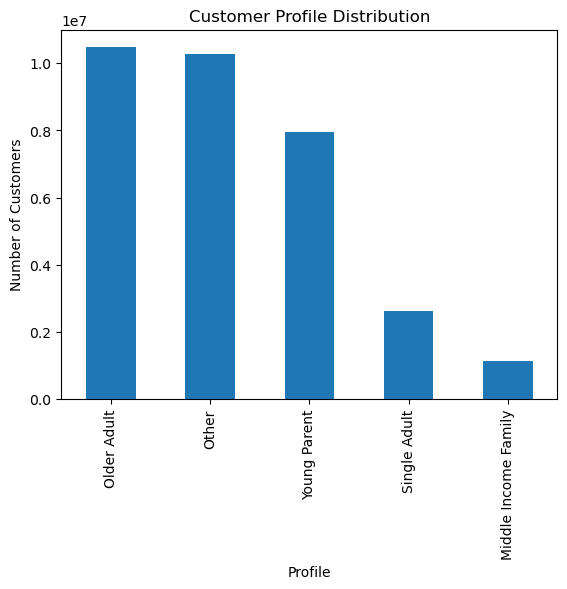

In [8]:
import matplotlib.pyplot as plt
df['profile'].value_counts().plot.bar()
plt.title('Customer Profile Distribution')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')
plt.savefig(r'C:\Users\moein\anaconda3\4 - Python Fundamentals\04 Analysis\4.10\profile_distribution.png')
plt.show()

### 🔹Step 7: Aggregate Usage and Spending

In [9]:
agg = df.groupby('profile').agg({'order_number': ['max', 'mean', 'min'], 'prices': ['max', 'mean', 'min']})
print(agg)

                     order_number                  prices                
                              max       mean min      max       mean  min
profile                                                                  
Middle Income Family           99  16.799738   1     25.0   7.280949  1.0
Older Adult                    99  17.101905   1  99999.0  11.650186  1.0
Other                          99  17.214456   1  99999.0  12.865932  1.0
Single Adult                   99  17.055315   1  99999.0  11.921218  1.0
Young Parent                   99  17.183535   1  99999.0  11.950025  1.0


### 🔹Step 8: Compare Profiles with Region and Department

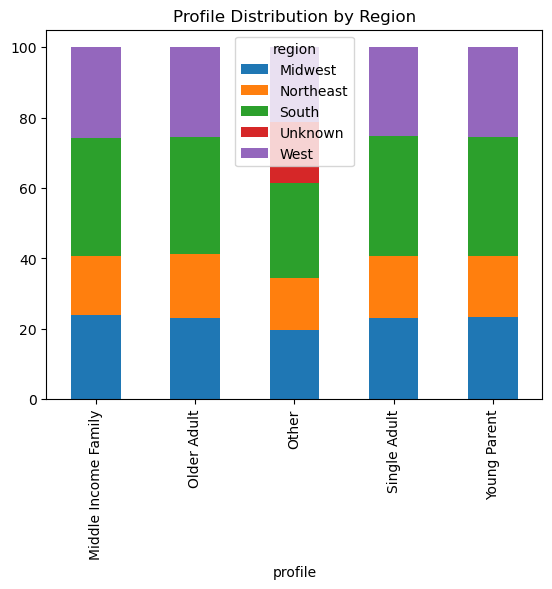

In [10]:
cross_region = pd.crosstab(df['profile'], df['region'], normalize='index') * 100
cross_dept = pd.crosstab(df['profile'], df['department_id'], normalize='index') * 100

# Optional visualization
cross_region.plot(kind='bar', stacked=True)
plt.title('Profile Distribution by Region')
plt.savefig(r'C:\Users\moein\anaconda3\4 - Python Fundamentals\04 Analysis\4.10\profiles_by_region.png')
plt.show()

### 🔹Step 9: Additional Charts

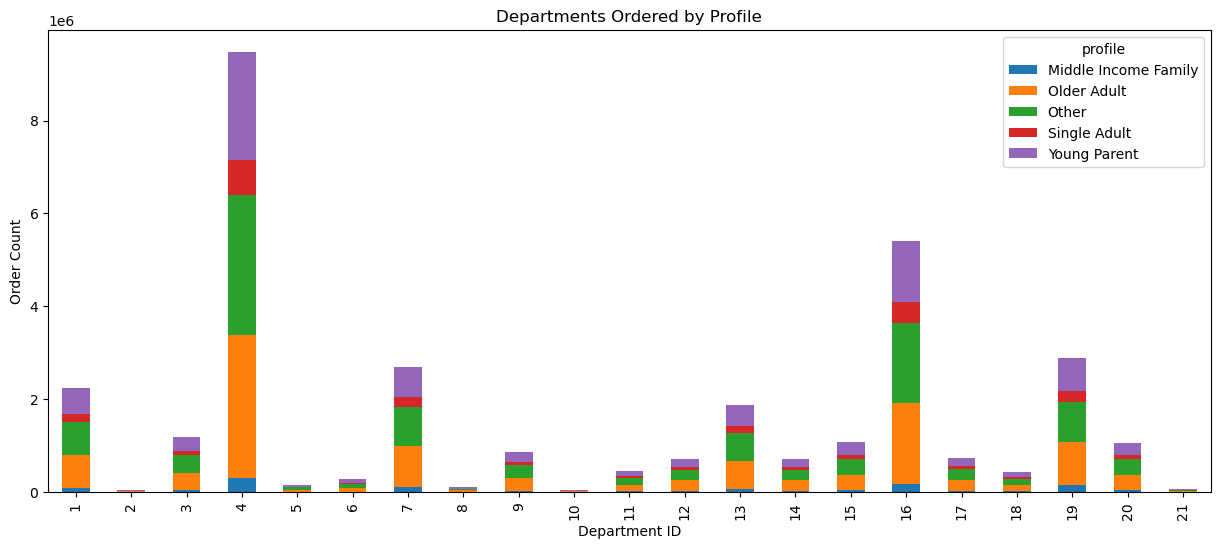

In [11]:
# Visualizing department preference by profile
df.groupby(['profile', 'department_id']).size().unstack().fillna(0).T.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Departments Ordered by Profile')
plt.xlabel('Department ID')
plt.ylabel('Order Count')
plt.savefig(r'C:\Users\moein\anaconda3\4 - Python Fundamentals\04 Analysis\4.10\dept_by_profile.png')
plt.show()

### 🔹Step 10: Finalize

In [12]:
df.to_pickle(r'C:\Users\moein\anaconda3\4 - Python Fundamentals\02 Data\Prepared Data\final_data.pkl')